In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import skimage.data
import tensorflow as tf

# TODO: figure out a better way of doing this
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import register
import utils

# load sample image
im = skimage.data.astronaut()


Instructions for updating:
Use the retry module or similar alternatives.


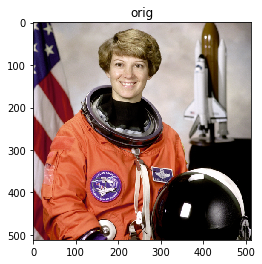

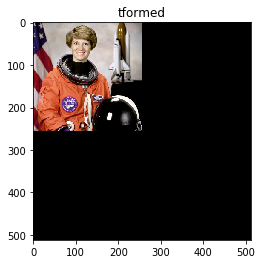

In [2]:

im_tensor = tf.Variable(im, 'im', dtype=tf.float32) 
# (x', y') = ((a0 x + a1 y + a2) / k, (b0 x + b1 y + b2) / k), where k = c0 x + c1 y + 1
tform = [2, 0, 0,] + [0, 2, 0] + [0.000, 0.000]

tformer = tf.contrib.image.transform(
    im_tensor,
    tform,
    interpolation='NEAREST',
)

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    im_transformed_true = session.run(tformer)

plt.figure(1)
plt.title('orig')
plt.imshow(im)
plt.figure(2)
plt.title('tformed')
plt.imshow(im_transformed_true.astype('uint8'))
plt.show()

In [4]:

im_tensor = tf.Variable(im, 'im', dtype=tf.float32)
tform_param = tf.Variable([1, 0, 0, 0, 1, 0, 0, 0], 'param', dtype=tf.float32)

tformed_image = tf.contrib.image.transform(
    im_tensor,
    tform_param,
    interpolation='NEAREST',
)


# defining custom loss, gradient - 
# https://stackoverflow.com/questions/43839431/tensorflow-how-to-replace-or-modify-gradient

# @tf.contrib.eager.custom_gradient
@tf.custom_gradient
def ssd(x):
    e = tf.losses.mean_squared_error(im_transformed_true, tformed_image)
    def grad(dy):
        return e
    return e, grad

 # the loss function
adam = tf.train.AdamOptimizer()
a = adam.minimize(ssd, var_list=tform_param)

init = tf.global_variables_initializer()
    
with tf.Session() as sess:
    sess.run(init)
    for i in range(200):
        sess.run(a) # run for the number of training steps
    p = sess.run(tform_param)
    
    print(p) # this will output our current weights after training
    # e_val = sess.run(mean_t) # compute our MSE
    # print(e_val) # print our MSE.


SystemError: <built-in function TFE_Py_TapeSetWatch> returned a result with an error set

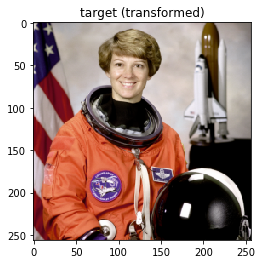

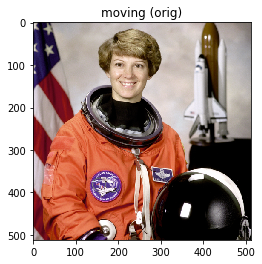

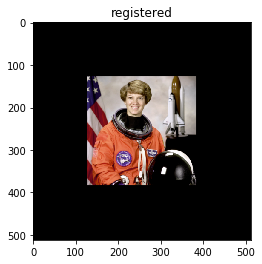

In [3]:
# Eample 1 - scaling only

scale_true = .5

# assign target and moving
im_fixed = skimage.transform.rescale(
    im, scale=scale_true, clip=True, multichannel=True,
    mode='constant', anti_aliasing=True
)
im_moving = im
options = {'maxiter': 30}
# im_registered = register.im_register_scale(im_fixed, im_moving)


plt.figure(1)
plt.title('target (transformed)')
plt.imshow(im_fixed)
plt.figure(2)
plt.title('moving (orig)')
plt.imshow(im_moving)
plt.figure(3)
plt.title('registered')
plt.imshow(im_registered)
plt.show()